In [3]:

import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

2023-05-01 08:40:26.035993: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-01 08:40:26.063521: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-01 08:40:26.064055: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 08:40:26.635887: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
pip install tensorflow


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf

In [6]:
train_dir = '/home/bcca/Desktop/prml/train'
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=(32, 32),
                                                                 batch_size=32)


Found 3115 files belonging to 36 classes.


2023-05-01 08:40:28.949342: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-01 08:40:28.967763: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  horizontal_flip=True,
                                  shear_range=True,
                                  rotation_range=40,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2
                                )
training_set = train_datagen.flow_from_directory('/home/bcca/Desktop/prml/train',
                                                target_size=(32,32),
                                                batch_size=32,
                                                class_mode='categorical')

Found 3115 images belonging to 36 classes.


In [8]:
val_datagen = ImageDataGenerator(rescale=1/255.)

validation_set = val_datagen.flow_from_directory('/home/bcca/Desktop/prml/validation',
                                                target_size=(32,32),
                                                batch_size=32,
                                                class_mode='categorical')

Found 351 images belonging to 36 classes.


In [14]:
test_datagen = ImageDataGenerator(rescale=1/255.)

test_set = test_datagen.flow_from_directory('/home/bcca/Desktop/prml/test',
                                           target_size=(64,64),
                                           batch_size=32,
                                           class_mode='categorical')

Found 359 images belonging to 36 classes.


In [10]:
classes = train_data.class_names
print(classes)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [11]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

In [15]:
model = Sequential()

model.add(Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,activation='relu',kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,activation='relu',kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units=36,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 batch_normalization_3 (Batc  (None, 12, 12, 128)     

In [17]:

r = model.fit(training_set,
              epochs=100,
              batch_size=32,
              validation_data=validation_set,
              )

Epoch 1/100


2023-05-01 08:54:58.792022: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-01 08:54:59.246010: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Matrix size-incompatible: In[0]: [32,0], In[1]: [1024,64]
	 [[{{node sequential_1/dense_3/Relu}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/dense_3/Relu' defined at (most recent call last):
    File "/home/bcca/.conda/envs/dity/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/bcca/.conda/envs/dity/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/bcca/.conda/envs/dity/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/bcca/.conda/envs/dity/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/bcca/.conda/envs/dity/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_2034645/2428001835.py", line 1, in <module>
      r = model.fit(training_set,
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/home/bcca/.c3yx45m/A4/Q2/venv/lib/python3.9/site-packages/keras/backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/dense_3/Relu'
Matrix size-incompatible: In[0]: [32,0], In[1]: [1024,64]
	 [[{{node sequential_1/dense_3/Relu}}]] [Op:__inference_train_function_8085]

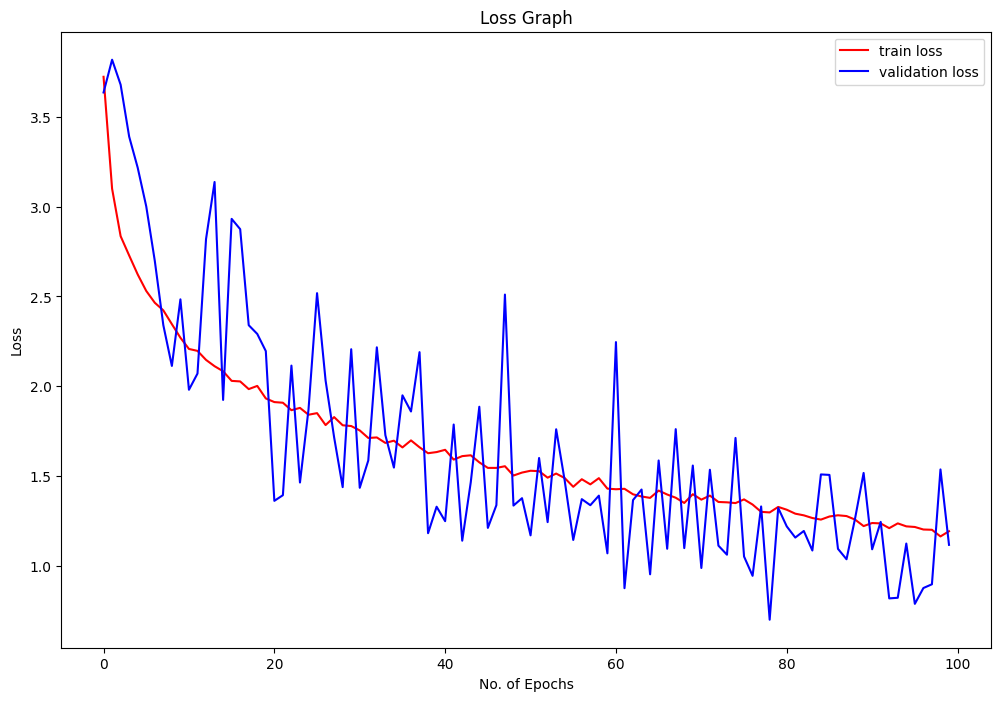

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

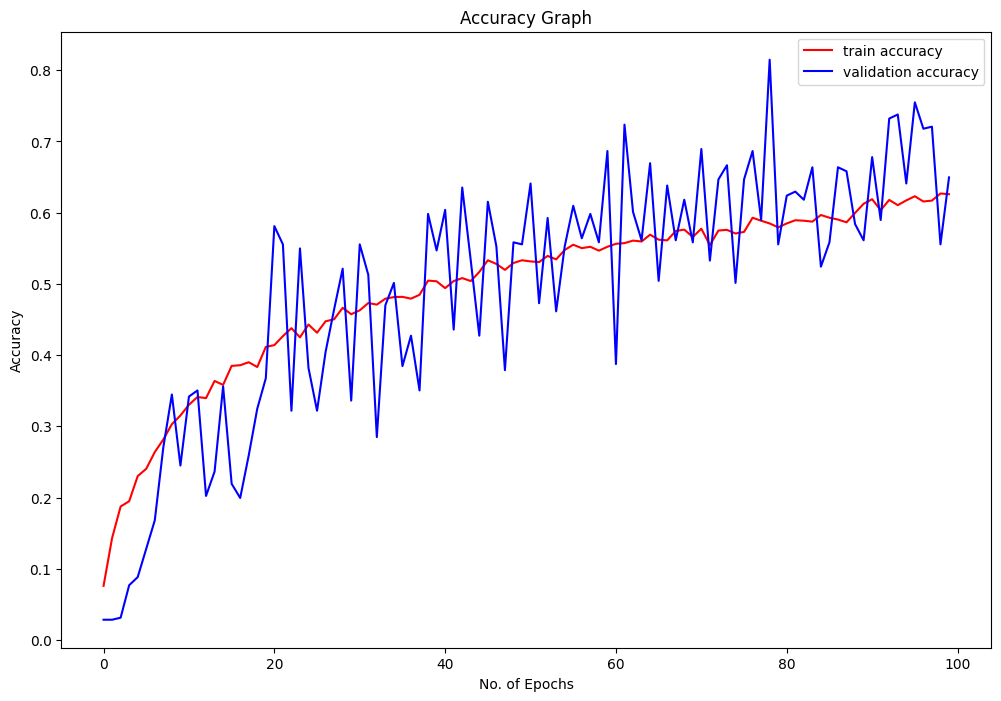

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(r.history['accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_accuracy'],'b',label='validation accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [ ]:
model.evaluate(test_set)

2023-05-01 08:29:01.360378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


12/12 [==============================] - 7s 566ms/step - loss: 1.1070 - accuracy: 0.6546


[1.1070153713226318, 0.6545960903167725]

In [ ]:
from PIL import Image

# Load the RGB image using Pillow
img = Image.open('/home/bcca/Desktop/download.jpeg').convert('RGB')

# Resize the image to 256x256 using Pillow
img = img.resize((32, 32))

# Convert the image to a numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Convert the numpy array to a tensor
img_tensor = tf.convert_to_tensor(img_array)

# Print the shape of the tensor
print(img_tensor.shape)

NameError: name 'tf' is not defined

In [ ]:
import numpy as np

In [ ]:
a=np.array(img_tensor)

p=[]
p.append(img_tensor)
p=np.array(p)

In [50]:
y_pred = model.predict(p)
y_classes = [np.argmax(element) for element in y_pred]
print((classes[y_classes[0]]))

1/1 [==============================] - 0s 13ms/step
banana
